Data Preparation and Custom Unit Conversion

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("./train.csv", header = 0)
test_df = pd.read_csv("./test.csv", header=0)

factorize = {
    'Crore+': 10000000,
    'Lac+': 100000,
    'Thou+': 1000,
    'Hund+': 100,
    '0': 0,
}

def convert_custom_with_mapping(val, mapping=factorize):
    parts = val.split()
    amount_value = float(parts[0])
    unit_type = parts[-1]

    factor = mapping.get(unit_type, None)
    return amount_value * factor

df['Total Assets'] = df['Total Assets'].apply(convert_custom_with_mapping)
test_df['Total Assets'] = test_df['Total Assets'].apply(convert_custom_with_mapping)


df['Liabilities'] = df['Liabilities'].apply(convert_custom_with_mapping)
test_df['Liabilities'] = test_df['Liabilities'].apply(convert_custom_with_mapping)




Party-wise Analysis of Candidate Attributes

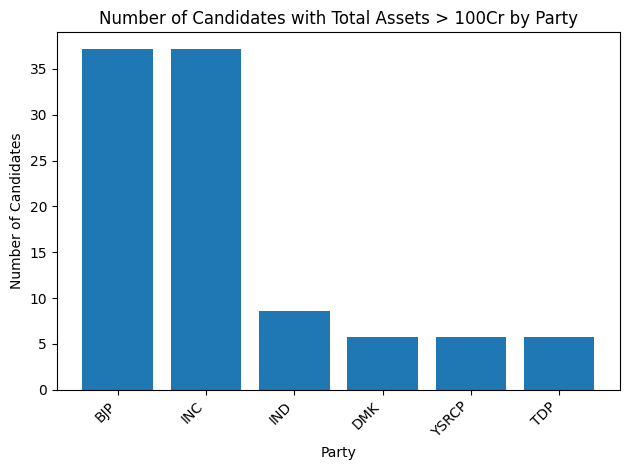

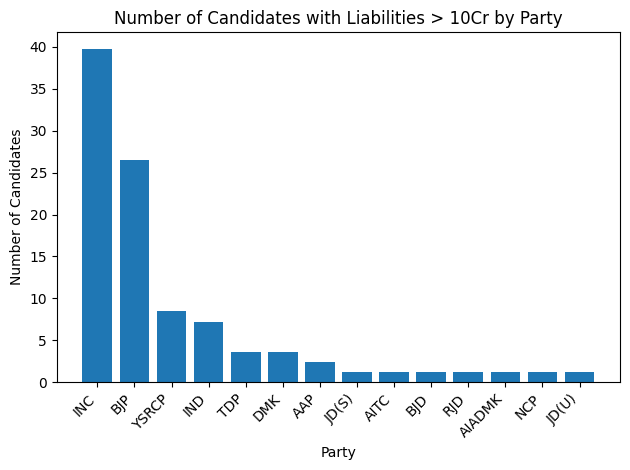

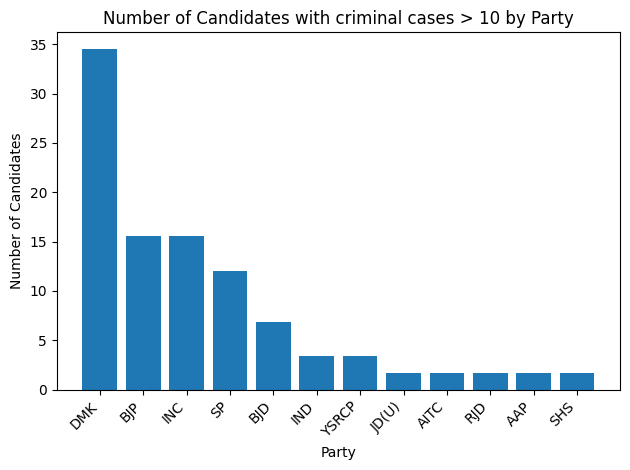

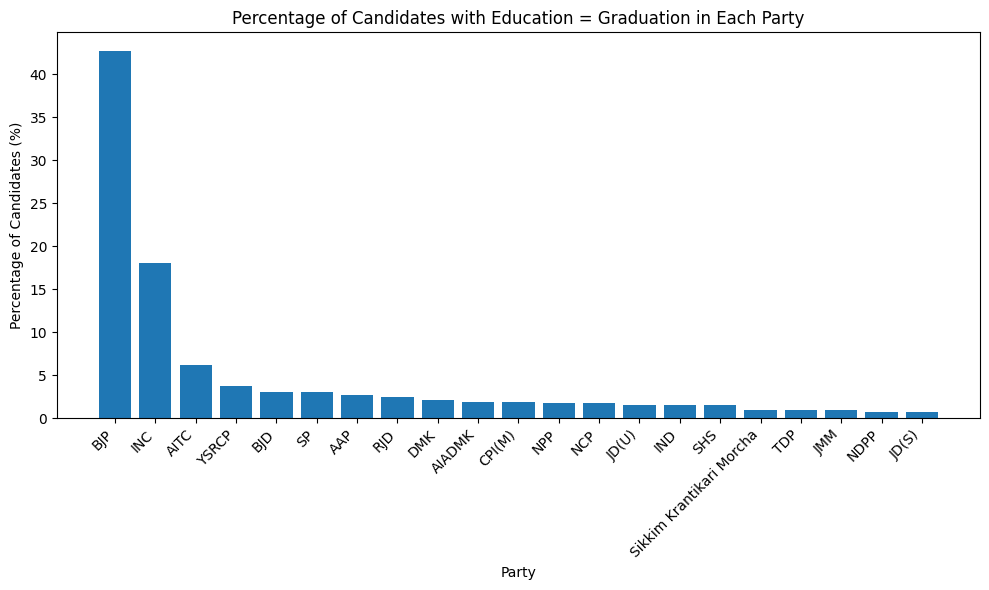

In [ ]:
import matplotlib.pyplot as plt


def plot_dep(df, column, threshold, title):

    plot_df = df[df[column] > threshold]['Party'].value_counts()

    total = plot_df.sum()
    percent = (plot_df / total) * 100

    plt.bar(percent.index, percent.values)
    plt.xlabel('Party')
    plt.ylabel('Number of Candidates')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_dep(df, 'Total Assets', 1000000000, 'Number of Candidates with Total Assets > 100Cr by Party')
plot_dep(df, 'Liabilities', 100000000, 'Number of Candidates with Liabilities > 10Cr by Party')
plot_dep(df, 'Criminal Case', 10, 'Number of Candidates with criminal cases > 10 by Party')


plot_df = df[df['Education'] == 'Graduate']['Party'].value_counts()

total = plot_df.sum()
percent = (plot_df / total) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(percent.index, percent.values)
plt.xlabel('Party')
plt.ylabel('Percentage of Candidates (%)')
plt.title('Percentage of Candidates with Education = Graduation in Each Party')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Normalization and Mapping of Categorical Variables.

In [ ]:
m_a = df['Total Assets'].max()
m_a1 = test_df['Total Assets'].max()
m_l = df['Liabilities'].max()
m_l1 = test_df['Liabilities'].max()

df['Total Assets'] = df['Total Assets']/m_a
test_df['Total Assets'] = test_df['Total Assets']/m_a1

df['Liabilities']=df['Liabilities']/m_l
test_df['Liabilities']=test_df['Liabilities']/m_l1

edu = { 'Literate': 0, '5th Pass': 1, '8th Pass': 2, '10th Pass': 3, '12th Pass': 4, 'Graduate': 5, 'Post Graduate': 6, 'Graduate Professional': 7, 'Doctorate': 8,'Others':9}
rev_edu = {9:'Others' ,0:'Literate', 1:'5th Pass', 2:'8th Pass', 3:'10th Pass', 4:'12th Pass', 5:'Graduate', 6:'Post Graduate', 7:'Graduate Professional', 8:'Doctorate'}
df['Education'] = df['Education'].map(edu)

# df.head()

party_mapping = {party: i for i, party in enumerate(df['Party'].unique())}
state_mapping = {state: i for i, state in enumerate(df['state'].unique())}

df['Party'] = df['Party'].map(party_mapping)
test_df['Party'] = test_df['Party'].map(party_mapping)

df['state'] = df['state'].map(state_mapping)
test_df['state'] = test_df['state'].map(state_mapping)



Random Forest Classifier Training and F1 Score Evaluation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 29)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state = 29)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

reversefactor = dict(zip(range(10),edu))
y_test = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)

f1_score(y_test,y_pred, average='weighted')



0.2256719465647203

Predicting Education Levels and Generating Submission File

In [ ]:
col = ['Party','Criminal Case','Total Assets','Liabilities','state']

final = clf.predict(test_df[col])

sub_df=pd.DataFrame({"ID":test_df["ID"].values})
sub_df["Education"]=final

sub_df["Education"]=sub_df["Education"].map(rev_edu)

sub_df.head()

sub_df.to_csv("Kaggle.csv",index=False)

# print(sub_df.head())

   ID              Education
0   0               Graduate
1   1               Graduate
2   2               Graduate
3   3               Graduate
4   4  Graduate Professional


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
